In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [30]:
url = "https://raw.githubusercontent.com/AnnaNebuko/ABD-PRJ-25-2team-HAPPINESS/main/data_cleaned.csv"
df = pd.read_csv(url)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,idno,agea,rlgdgr,polintr,sclmeet,happy,cntry,nwspol,pplfair,health,...,actrolga,cptppola,trstprl,trstlgl,trstplc,trstplt,vote,stfeco,stfdem,stfedu
0,50030,21.0,0.0,2.0,7.0,9.0,AT,90.0,0.0,2.0,...,2.0,2.0,6.0,6.0,4.0,1.0,1.0,2.0,7.0,10.0
1,50057,53.0,8.0,2.0,4.0,9.0,AT,30.0,9.0,1.0,...,4.0,3.0,7.0,5.0,8.0,4.0,1.0,6.0,6.0,5.0
2,50106,78.0,6.0,3.0,6.0,7.0,AT,15.0,6.0,3.0,...,2.0,3.0,5.0,6.0,9.0,3.0,2.0,4.0,6.0,5.0
3,50145,64.0,1.0,2.0,5.0,9.0,AT,60.0,3.0,2.0,...,1.0,3.0,6.0,8.0,8.0,5.0,1.0,6.0,8.0,9.0
4,50158,59.0,3.0,2.0,6.0,8.0,AT,120.0,8.0,1.0,...,3.0,3.0,3.0,5.0,7.0,5.0,1.0,4.0,3.0,3.0


In [31]:
df['happy'] = df['happy'].astype(int)

X = df.drop('happy', axis=1)
y = df['happy']

In [32]:
# закодируем категориальные признаки
X = pd.get_dummies(X, columns=['cntry', 'gndr'], drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel


# Создание и обучение модели
model = OrderedModel(y, X_scaled_df, distr='logit') 
result = model.fit(method='bfgs') 

print(result.summary())

Optimization terminated successfully.
         Current function value: 1.517116
         Iterations: 86
         Function evaluations: 87
         Gradient evaluations: 87
                             OrderedModel Results                             
Dep. Variable:                  happy   Log-Likelihood:                -18573.
Model:                   OrderedModel   AIC:                         3.727e+04
Method:            Maximum Likelihood   BIC:                         3.774e+04
Date:                Thu, 12 Jun 2025                                         
Time:                        10:29:09                                         
No. Observations:               12242                                         
Df Residuals:                   12179                                         
Df Model:                          53                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [ ]:
# Создаем DataFrame из параметров модели
df_results = pd.DataFrame({
    'coef': result.params,
    'std_err': result.bse,
    'z_value': result.tvalues,
    'p_value': result.pvalues,
    'ci_lower': result.conf_int()[0],
    'ci_upper': result.conf_int()[1]
})

# Добавляем названия переменных
df_results.index = result.model.exog_names


df_results.sort_values('coef').head(10)

,coef,std_err,z_value,p_value,ci_lower,ci_upper
0/1,-7.865869,0.221236,-35.554215,7.151563e-277,-8.299484,-7.432255
4/5,-0.349998,0.067746,-5.166303,2.387692e-07,-0.482778,-0.217217
health,-0.316640,0.020750,-15.259370,1.426184e-52,-0.357310,-0.275969
fltdpr,-0.273341,0.021094,-12.958076,2.114857e-38,-0.314685,-0.231997
1/2,-0.251025,0.210344,-1.193404,2.327112e-01,-0.663292,0.161241
...,...,...,...,...,...,...
stfeco,0.238378,0.023814,10.010079,1.376419e-23,0.191704,0.285052
7/8,0.342189,0.019663,17.402700,7.870483e-68,0.303650,0.380727
9/10,0.523299,0.017910,29.218673,1.123239e-187,0.488197,0.558402
8/9,0.638723,0.014155,45.124971,0.000000e+00,0.610981,0.666466


Коэффициенты показывают, как изменение предиктора на 1 единицу влияет на логарифм шансов (log-odds) оказаться в более высокой категории счастья.

- Самые значимые положительные факторы (+):
enjlf (0.659, p<0.001) - Удовольствие от жизни

atchctr (0.231, p<0.001) - Привязанность к стране

stfeco (0.238, p<0.001) - Удовлетворенность экономикой

trstplc (0.164, p<0.001) - Доверие полиции

pplfair (0.142, p<0.001) - Вера в честность людей

- Самые значимые отрицательные факторы (-):
health (-0.317, p<0.001) - Плохое здоровье

fltdpr (-0.273, p<0.001) - Чувство депрессии

fltlnl (-0.235, p<0.001) - Чувство одиночества

cntry_GR (-0.240, p<0.001) - Проживание в Греции (относительно базовой страны)

hincfel (-0.210, p<0.001) - Финансовые трудности



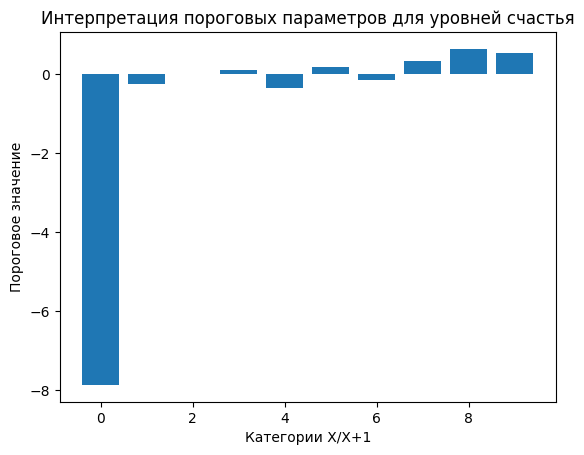

In [105]:
# Интерпретация пороговых параметров
thresholds = result.params[-10:]  # Последние 10 параметров — пороги
plt.bar(range(10), thresholds)
plt.title('Интерпретация пороговых параметров для уровней счастья')
plt.xlabel("Категории X/X+1")
plt.ylabel("Пороговое значение")
plt.show()

Самый резкий переход:

0/1 = -7.866 — огромный отрицательный порог. Это означает, что люди очень редко выбирают категорию 0 (крайняя несчастливость), и даже минимальные значения предикторов "переводят" их в категорию 1.

8/9 = 0.639 — самый большой положительный скачок. Переход от 8 к 9 требует значительно более высоких значений предикторов (например, очень сильного удовольствия от жизни enjlf).

Самые значимые пороги (p < 0.001):

4/5 = -0.35 — барьер между "умеренно несчастливыми" (4) и "нейтральными" (5).

5/6 = 0.184 — переход от "нейтральных" (5) к "слегка счастливым" (6).

7/8 = 0.342 и 8/9 = 0.639 — требуют максимальных усилий для перехода между высокими уровнями счастья.

Незначимые пороги (p > 0.05):

1/2 = -0.251 (p=0.233)

2/3 = 0.010 (p=0.934)

3/4 = 0.095 (p=0.217)
Это означает, что разница между этими категориями слабо выражена, и модель плохо их разделяет.

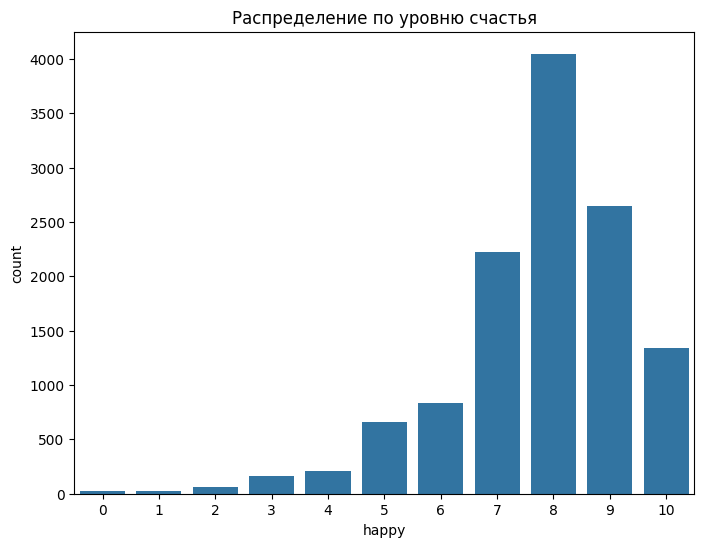

In [106]:
fig = plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='happy')
plt.title('Распределение по уровню счастья')
plt.show()

In [ ]:
# Объединим уровень счастья в категории
df['happiness_group'] = pd.cut(
    df['happy'],  
    bins=[-1, 4, 7, 10],  # Границы: (-1,4], (4,7], (7,10]
    labels=['low', 'medium', 'high']  
)

print(df['happiness_group'].value_counts(normalize=True))

happiness_group
high      0.656755
medium    0.304035
low       0.039209
Name: proportion, dtype: float64


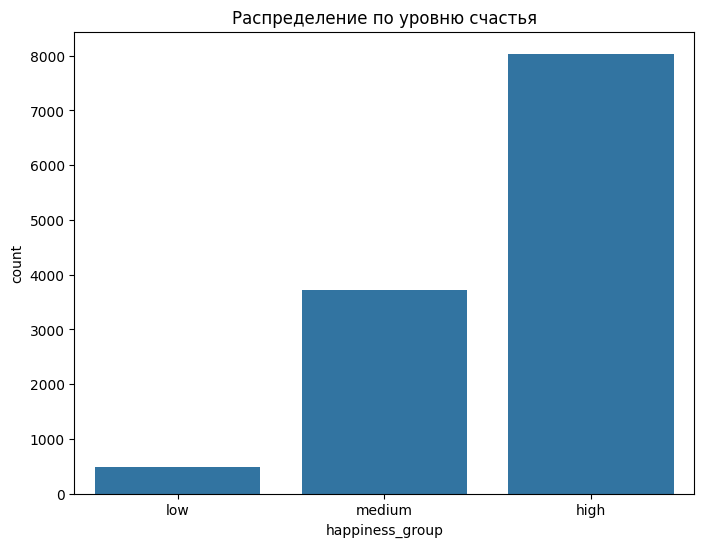

In [107]:
fig = plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='happiness_group')
plt.title('Распределение по уровню счастья')
plt.show()

In [109]:
# Создание и обучение модели с категориями

model_w_cat = OrderedModel(df['happiness_group'], X_scaled_df, distr='logit')  
result_w_cat = model_w_cat.fit(method='bfgs') 


print(result_w_cat.summary())

Optimization terminated successfully.
         Current function value: 0.584389
         Iterations: 39
         Function evaluations: 40
         Gradient evaluations: 40
                             OrderedModel Results                             
Dep. Variable:        happiness_group   Log-Likelihood:                -7154.1
Model:                   OrderedModel   AIC:                         1.442e+04
Method:            Maximum Likelihood   BIC:                         1.483e+04
Date:                Thu, 12 Jun 2025                                         
Time:                        10:44:28                                         
No. Observations:               12242                                         
Df Residuals:                   12187                                         
Df Model:                          53                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

In [ ]:
# Создаем DataFrame из параметров модели
df_results_w_cat = pd.DataFrame({
    'coef': result_w_cat.params,
    'std_err': result_w_cat.bse,
    'z_value': result_w_cat.tvalues,
    'p_value': result_w_cat.pvalues,
    'ci_lower': result_w_cat.conf_int()[0],
    'ci_upper': result_w_cat.conf_int()[1]
})

# Добавляем названия переменных
df_results_w_cat.index = result_w_cat.model.exog_names



,coef,std_err,z_value,p_value,ci_lower,ci_upper
health,-0.301299,0.026282,-11.464120,1.997792e-30,-0.352810,-0.249787
fltdpr,-0.261533,0.025013,-10.455681,1.380039e-25,-0.310558,-0.212507
fltlnl,-0.228868,0.023240,-9.848193,6.978713e-23,-0.274416,-0.183319
hincfel,-0.225718,0.024428,-9.240253,2.459156e-20,-0.273595,-0.177840
cntry_GR,-0.216904,0.028367,-7.646225,2.069654e-14,-0.272503,-0.161305
cntry_FR,-0.164696,0.031356,-5.252486,1.500602e-07,-0.226153,-0.103240
gndr_1,-0.152027,0.032121,-4.732905,2.213295e-06,-0.214983,-0.089070
iphlppla,-0.115536,0.023107,-5.000024,5.732319e-07,-0.160825,-0.070247
impfuna,-0.101015,0.025086,-4.026711,5.656258e-05,-0.150183,-0.051847
cntry_CY,-0.095071,0.024583,-3.867401,1.100013e-04,-0.143252,-0.046890


In [ ]:
# Посмотрим веса статзначимых предикторов
mask = df_results_w_cat['p_value'] < 0.05

df_results_w_cat[mask][:-2].sort_values('coef', ascending=False)

,coef,std_err,z_value,p_value,ci_lower,ci_upper
enjlf,0.637981,0.025627,24.894742,8.482561e-137,0.587752,0.688209
stfeco,0.284268,0.030957,9.182657,4.205840e-20,0.223593,0.344943
atchctr,0.215138,0.024235,8.877059,6.865140e-19,0.167638,0.262639
trstplc,0.163756,0.029315,5.586054,2.322869e-08,0.106299,0.221212
hhmmb,0.136923,0.024943,5.489541,4.029798e-08,0.088037,0.185809
pplfair,0.136771,0.024426,5.599418,2.150726e-08,0.088897,0.184645
agea,0.129979,0.029456,4.412630,1.021225e-05,0.072246,0.187712
cntry_DE,0.117174,0.034476,3.398733,6.769886e-04,0.049603,0.184746
stfedu,0.097610,0.028177,3.464136,5.319380e-04,0.042384,0.152837
cntry_FI,0.088725,0.032811,2.704167,6.847593e-03,0.024418,0.153033


Log-Likelihood: -7154.1 (лучше, чем в исходной модели с 10 уровнями)

AIC/BIC: 1.442e+04 / 1.483e+04 (уменьшились, что указывает на улучшение)

Пороговые значения:

low/medium: -4.289 (p<0.001) — резкий переход между низким и средним уровнем

medium/high: 1.239 (p<0.001) — значимый, но менее выраженный скачок к высокому уровню

Усилилось влияние:

stfeco (+0.284 vs +0.238) — экономическая удовлетворенность стала важнее

gndr_1 (-0.152 vs -0.109) — гендерные различия более выражены

Ослабело влияние:

aesfdrk (-0.051 vs -0.061) — страх перед преступностью менее значим

alcfreq (+0.025 vs +0.069) — частота употребления алкоголя потеряла значимость

cntry_GR	-0.216904	0.028367	-7.646225	2.069654e-14	-0.272503	-0.161305
hincfel	-0.225718	0.024428	-9.240253	2.459156e-20	-0.273595	-0.177840
fltlnl	-0.228868	0.023240	-9.848193	6.978713e-23	-0.274416	-0.183319
fltdpr	-0.261533	0.025013	-10.455681	1.380039e-25	-0.310558	-0.212507
health	-0.301299

Список значимых предикторов уровня счастья

1. Сильнейшие положительные эффекты
(↑ Увеличивают вероятность высокого уровня счастья)

enjlf (0.638, p<0.001) — Удовольствие от жизни

stfeco (0.284, p<0.001) — Удовлетворенность экономикой

atchctr (0.215, p<0.001) — Привязанность к стране

trstplc (0.164, p<0.001) — Доверие полиции

hhmmb (0.137, p<0.001) — Размер домохозяйства

pplfair (0.137, p<0.001) — Вера в честность людей

2. Сильнейшие отрицательные эффекты
(↓ Повышают риск низкого уровня счастья)

health (-0.301, p<0.001) — Плохое здоровье

fltdpr (-0.262, p<0.001) — Чувство депрессии

fltlnl (-0.229, p<0.001) — Чувство одиночества

hincfel (-0.226, p<0.001) — Финансовые трудности

cntry_GR (-0.217, p<0.001) — Проживание в Греции (vs базовая страна)

gndr_1 (-0.152, p<0.001) — Мужчины (vs женщины)


🔹 Незначимые предикторы (p > 0.05, можно исключить из модели)
idno, polintr, nwspol, pray, impsafea, slprl, dosprt, alcfreq, height, fnsdfml, emplrel, trstlgl, stfdem, dscrgrp, impdiffa, ipsucesa, cgtsmok, paccnt, actrolga, trstprl, trstplt, cntry_BE, cntry_CH, cntry_GB.